<a href="https://colab.research.google.com/github/KONA1005/google_drive/blob/main/google_colab/Chapter_4_1_%EC%A0%95%EC%8A%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- 컬럼 설명 177p 그림

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 변환하기
- 배열로 변환

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input.shape

(159, 5)

- target 함수 배열로 변환
- 종속변수



In [ ]:
fish_target = fish['Species'].to_numpy()

# 훈련 데이터와 테스트데이터

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

- 표준화 전처리 진행


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
print(train_input[:5])
print(train_scaled[:5])
print(test_scaled[:5])

[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]
[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


# **표준화 왜 해?**
- 첫번째는 몸무게. 단위 g, 나머지는 cm
- 이 수식을 단위별로 인식할까 머신러닝이? 아니야 그럼 값이 왜곡되는 현상이 발생해
- 목적도 다 달라
- 결국 단위가 다르니까 통일을 시켜줘야해
- 이것이 표준화다


# k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- **182p 중요**

- 다중분류
- 주어진 데이터(독립변수) 로 해당 종분류
- perch 에 1 있다 ? 걔는 perch다.
- 0.6667값의 확률로 퍼치이거나 0.3333값의 확률로 파이크이거나
- 머신러닝을 돌려 바로 분류작업 하는게 아니고 확률값으로 떨어진걸 보고 가장 높은 수치로 기록한애를 기준으로 또 분류해


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))
print(kn.classes_)

# 각각의 확률값이 나오고 최종적으로 분류작업은 perch, pike, smelt .. 
# 근데 또 구분을 해야하니까 퍼치라고 하고 퍼치라고하고..


[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


# **로지스틱 회귀**
- 중요도 최~~~상 제일중요
  - 개념 재복습 필요 유투브 찾아보기
- 왜중요?
  - 로지스틱회귀는 기초 통계로도 활용(의학통계에서 많이 씀)
  - 머신러닝 분류모형의 가장 기초모형인데 성능이 생각보다 나쁘지 않음
  - 데이터넷, 수치 데이터 기반으로 이뤄진거 확률 좋음
  - **딥러닝**의 거의 초기모형에 해당됨
  + https://youtu.be/zASrGSHoqL4 보기

- 로지스틱 회귀는 0, 1 로 확률계산해서 소위 맞다 아니다만 도출한다.
- 1 고양이, 0 강아지 , 0 소 일때 0.99나오면 고양이로 인식, 나머지는 고양이가 아니다로 인식 한다.

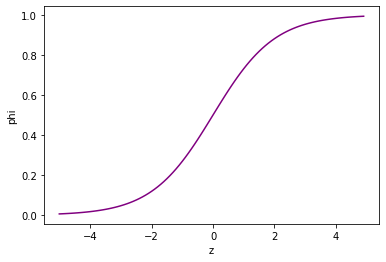

In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
# print(z)
# print(phi)

plt.plot(z, phi, color='purple')
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

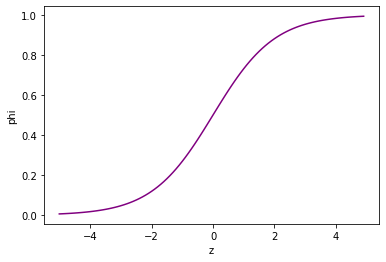

In [ ]:
# 객체지향
import numpy as numpy
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
# print(z)
# print(phi)

fig, ax = plt.subplots()
ax.plot(z, phi, color='purple') # 컬러 내맘대로 색지정 했음
ax.set_xlabel('z')
ax.set_ylabel('phi')
plt.show()


- 개발자 취업 원한다
  + 이거 하지마.. 공부 별도로 하지 않는다
  + 다만 컨셉만 이해해라
- 데이터 분석가 
  + 반드시 공부
  + 문과생이면 별도로 공부 열심히해라

# 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]]) # True값만 추출된다

['A' 'C']


In [ ]:
# 도미와 빙어의 행만 골라내기

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- 186p 
- 모형 만들고 예측하기

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#   독립변수                 종속변수
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 예측하기
# 클래스로 분류
# 자동으로 얘가 생략한거. 확률값이 나왔는데 0.5 기준으로 짜른거야
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


- 방정식의 각 기울기와 상수를 구하는 식
- 186p

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- z 값 식 나오고
- z값 출력해보자

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
# 양변에 로그를 취한 값 = z

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions)) # 확률값 구한거 아까 프레딕 프로바로 구한거랑 비슷.
# 프레딕 프로바 안에 들어가있다,,

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


****